# 6. Otsu Thresholding

## Table of Contents
1. [Libraries](#libraries)
2. [Single Thresholding](#single)
3. [Multi Thresholding](#multi)

Thresholding is used to create a binary image from a grayscale image

# **Names and IDs of team members:**

**Nombre Matrícula**

Félix Daniel Reyes López A01794458

Dante Cesar Cervantes Gutierrez A01794585

Ruben Guerrero del Fierro A01793005

Juan Manuel Carballo Montaño A01166758

**El método de Otsu**

En visión por computadora y procesamiento de imágenes, el método de Otsu, que lleva el nombre de Nobuyuki Otsu (大津展之, Ōtsu Nobuyuki), se utiliza para realizar umbrales automáticos de imágenes. En la forma más simple, el algoritmo devuelve un umbral de intensidad único que separa los píxeles en dos clases, primer plano y fondo. Este umbral se determina minimizando la variación de intensidad dentro de la clase, o de manera equivalente, maximizando la variación entre clases.

El método de Otsu funciona bien cuando el histograma tiene una distribución bimodal con un valle profundo y pronunciado entre los dos picos.

Como todos los demás métodos de umbral global, el método de Otsu funciona mal en caso de mucho ruido, tamaños de objetos pequeños, iluminación no homogénea y una variación intraclase mayor que entre clases[1]

## Importing Libraries <a class="anchor" id="libraries" ></a>

In [1]:
import matplotlib.pyplot as plt
from skimage import data
from skimage.filters import threshold_otsu
from skimage.filters import threshold_multiotsu
import numpy as np
import cv2
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import os
DIR = "/content/drive/MyDrive/Colab Notebooks/MNA/ComputerVision/Activities/9.4"
os.chdir(DIR)

## Single Thresholding <a class="anchor" id="single" ></a>

We illustrate how to apply one of these thresholding algorithms.
Otsu's method [2]_ calculates an "optimal" threshold (marked by a red line in the
histogram below) by maximizing the variance between two classes of pixels,
which are separated by the threshold. Equivalently, this threshold minimizes
the intra-class variance.

In [4]:
#img = cv2.imread('Image/01-Gaviota.jpg')
img = cv2.imread('Image/01-Gaviota02.jpg')
#img = cv2.imread('Image/04-Eolico.jpg')
img.shape

(700, 1088, 3)

In [5]:
img_color = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

(-0.5, 1087.5, 699.5, -0.5)

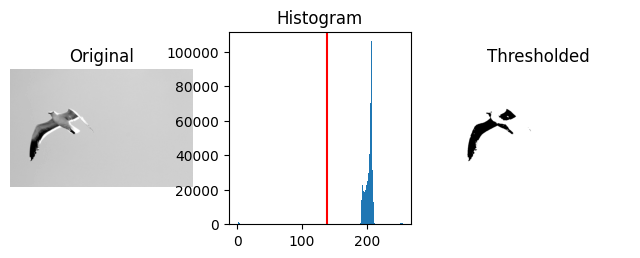

In [6]:
image = img_gray
thresh = threshold_otsu(image)
binary = image > thresh

fig, axes = plt.subplots(ncols=3, figsize=(8, 2.5))
ax = axes.ravel()
ax[0] = plt.subplot(1, 3, 1)
ax[1] = plt.subplot(1, 3, 2)
ax[2] = plt.subplot(1, 3, 3, sharex=ax[0], sharey=ax[0])

ax[0].imshow(image, cmap=plt.cm.gray)
ax[0].set_title('Original')
ax[0].axis('off')

ax[1].hist(image.ravel(), bins=256)
ax[1].set_title('Histogram')
ax[1].axvline(thresh, color='r')

ax[2].imshow(binary, cmap=plt.cm.gray)
ax[2].set_title('Thresholded')
ax[2].axis('off')



If you are not familiar with the details of the different algorithms and the
underlying assumptions, it is often difficult to know which algorithm will give
the best results. Therefore, Scikit-image includes a function to evaluate
thresholding algorithms provided by the library. At a glance, you can select
the best algorithm for your data without a deep understanding of their
mechanisms.




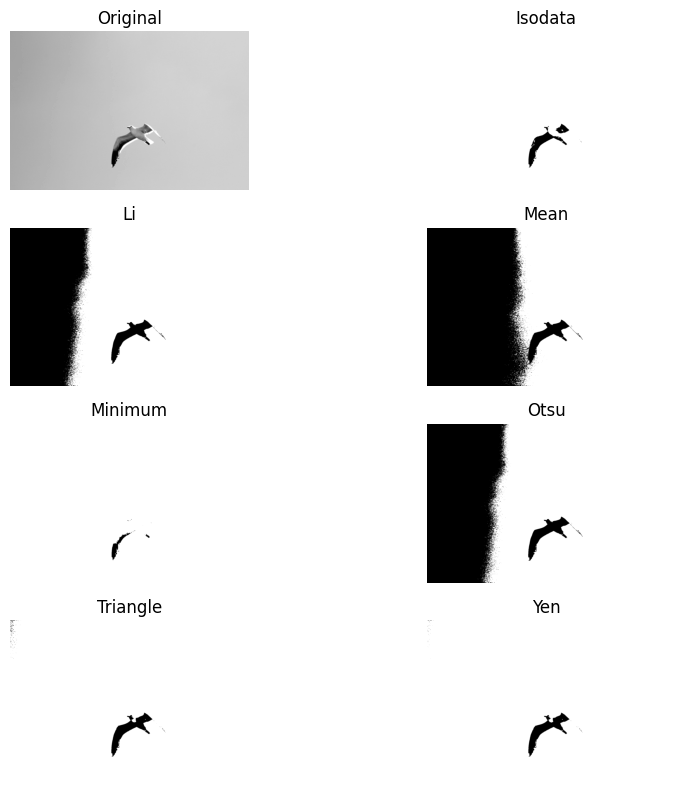

In [7]:
from skimage.filters import try_all_threshold

img = cv2.imread('Image/01-Gaviota.jpg')
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

fig, ax = try_all_threshold(img_gray, figsize=(10, 8), verbose=False)
plt.show()

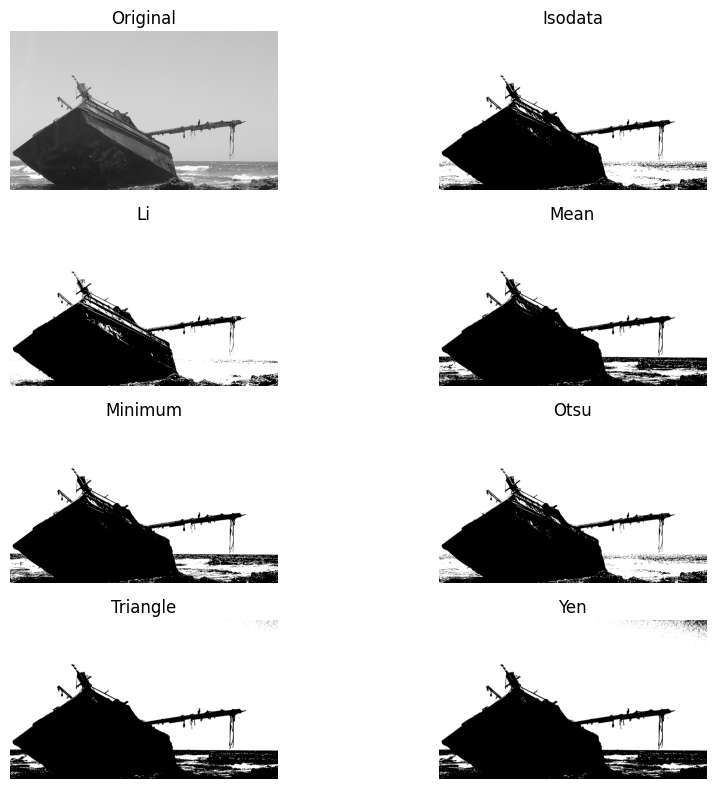

In [14]:
#from skimage.filters import try_all_threshold

img = cv2.imread('Image/Barco.jpg')
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

fig, ax = try_all_threshold(img_gray, figsize=(10, 8), verbose=False)
plt.show()

In [ ]:
# TODO: Slide image for segmentation, alpha blerding

## Multi Thresholding <a class="anchor" id="multi" ></a>

The multi-Otsu threshold  is a thresholding algorithm that is used to separate
the pixels of an input image into several different classes, each one obtained
according to the intensity of the gray levels within the image.

Multi-Otsu calculates several thresholds, determined by the number of desired
classes. The default number of classes is 3: for obtaining three classes, the
algorithm returns two threshold values. They are represented by a red line in
the histogram below.

In [15]:
img = cv2.imread('Image/eyes.jpg')
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img.shape

(2400, 2400, 3)

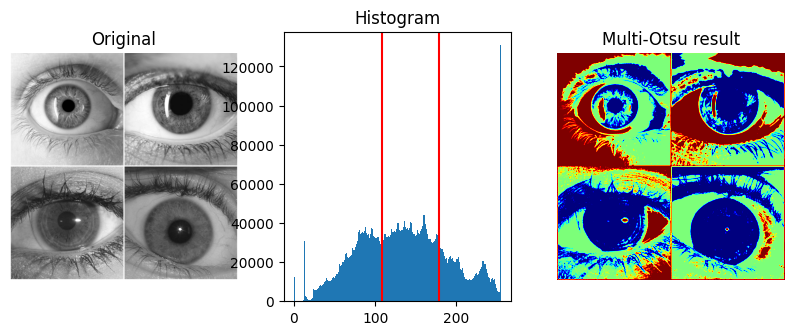

In [16]:
# The input image.
#image = data.camera()
image =img_gray

# Applying multi-Otsu threshold for the default value, generating
# three classes.
thresholds = threshold_multiotsu(img_gray)

# Using the threshold values, we generate the three regions.
regions = np.digitize(image, bins=thresholds)

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(10, 3.5))

# Plotting the original image.
ax[0].imshow(image, cmap='gray')
ax[0].set_title('Original')
ax[0].axis('off')

# Plotting the histogram and the two thresholds obtained from
# multi-Otsu.
ax[1].hist(image.ravel(), bins=255)
ax[1].set_title('Histogram')
for thresh in thresholds:
    ax[1].axvline(thresh, color='r')

# Plotting the Multi Otsu result.
ax[2].imshow(regions, cmap='jet')
ax[2].set_title('Multi-Otsu result')
ax[2].axis('off')

plt.subplots_adjust()

plt.show()

In [17]:
img = cv2.imread('Image/pato.jpg')
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img.shape


(3456, 5184, 3)

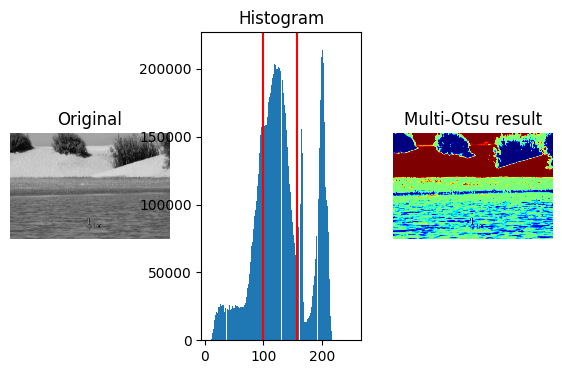

In [21]:
# The input image.
#image = data.camera()
image =img_gray

# Applying multi-Otsu threshold for the default value, generating
# three classes.
thresholds = threshold_multiotsu(img_gray)

# Using the threshold values, we generate the three regions.
regions = np.digitize(image, bins=thresholds)

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(7, 4))

# Plotting the original image.
ax[0].imshow(image, cmap='gray')
ax[0].set_title('Original')
ax[0].axis('off')

# Plotting the histogram and the two thresholds obtained from
# multi-Otsu.
ax[1].hist(image.ravel(), bins=255)
ax[1].set_title('Histogram')
for thresh in thresholds:
    ax[1].axvline(thresh, color='r')

# Plotting the Multi Otsu result.
ax[2].imshow(regions, cmap='jet')
ax[2].set_title('Multi-Otsu result')
ax[2].axis('off')

#plt.subplots_adjust()

plt.show()

Fuentes:
[1] Otsu's method, Recuperado el 09 Marzo del 2024, https://en.wikipedia.org/wiki/Otsu%27s_method